In [84]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.smooth as smooth
import mlgrad.funcs as funcs
import ipywidgets

%matplotlib widget

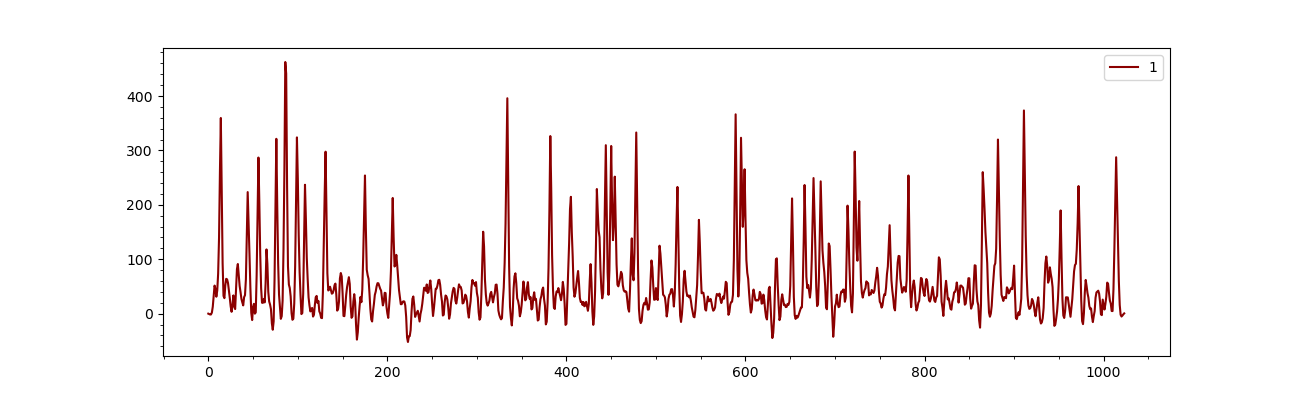

In [76]:
y = np.random.random(1024)
ii = np.random.randint(0, 1024, size=3000)
for i in ii:
    y[i] = 0
y += 0.03
y += np.random.normal(loc=0, scale=0.05, size=1024)
# y += y.min()
y[:6] = y[-6:] = 0


z = smooth.whittaker_smooth(1000*y, tau2=1.0)

plt.figure(figsize=(13,4))
# plt.vlines(range(1024), 0, y, alpha=0.5, label="0")
plt.plot(z, label="1", color="darkred")
plt.legend()
plt.minorticks_on()
plt.show()

In [77]:
x = z

In [78]:
tau2_slider = ipywidgets.FloatSlider(value=1, min=0, max=1.0e8, step=1)

def plot_wh(x):
    @ipywidgets.interact(tau2=tau2_slider, continuous_update=False)
    def _plot_wh(tau2=10.0):
        y = smooth.whittaker_smooth(x, tau2=tau2)
        plt.figure(figsize=(13,4))
        plt.plot(x, label="original")
        plt.plot(y, label="smoothed")
        plt.tight_layout()
        plt.show()

In [79]:
plot_wh(x)

interactive(children=(FloatSlider(value=1.0, description='tau2', max=100000000.0, step=1.0), Output()), _dom_c…

In [80]:
def baseline():
    xx = np.arange(1024)
    b = 500 / (1+xx/100) + 200*np.exp(-((xx-500)/200)**2 )
    return b

In [81]:
b = baseline()
xb = x + b

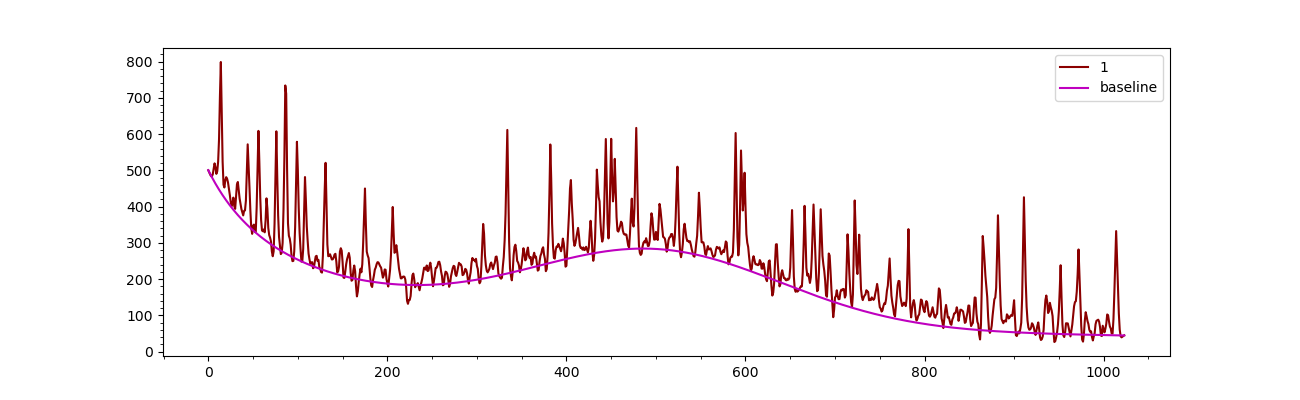

In [83]:
plt.figure(figsize=(13,4))
plt.plot(xb, label="1", color="darkred")
plt.plot(b, label="baseline", color="m")
plt.legend()
plt.minorticks_on()
plt.show()

In [103]:
def plot_wh_bl(x):
    @ipywidgets.interact(tau2=tau2_slider, continuous_update=False)
    def _plot_wh(tau2=10.0):
        b, _ = smooth.whittaker_smooth_weight_func2(x, tau2=tau2, func=funcs.Step(30.0))
        plt.figure(figsize=(13,4))
        plt.plot(x, label="original")
        plt.plot(b, label="baseline")
        plt.tight_layout()
        plt.show()

In [104]:
plot_wh_bl(xb)

interactive(children=(FloatSlider(value=616.0, description='tau2', max=100000000.0, step=1.0), Output()), _dom…